In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as p
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px

In [2]:
df = pd.read_csv("big_data.csv")

In [3]:
X = df.drop(columns=['ID', 'R6'])
y = df['R6']

In [4]:
df.describe()

,R1,R2,R3,R4,R5,R6
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,1889.694651,1917.857355,1941.678306,1945.806835,1935.222883,1932.758544
std,188.404128,202.450546,212.464627,222.073252,230.169282,240.201704
min,1563.000000,1468.000000,1403.000000,1376.000000,1348.000000,1287.000000
25%,1726.000000,1755.250000,1775.000000,1781.000000,1757.000000,1757.250000
50%,1890.500000,1920.500000,1944.500000,1948.000000,1939.500000,1942.000000
75%,2055.750000,2086.750000,2111.750000,2117.000000,2108.000000,2112.750000
max,2203.000000,2345.000000,2448.000000,2517.000000,2526.000000,2595.000000


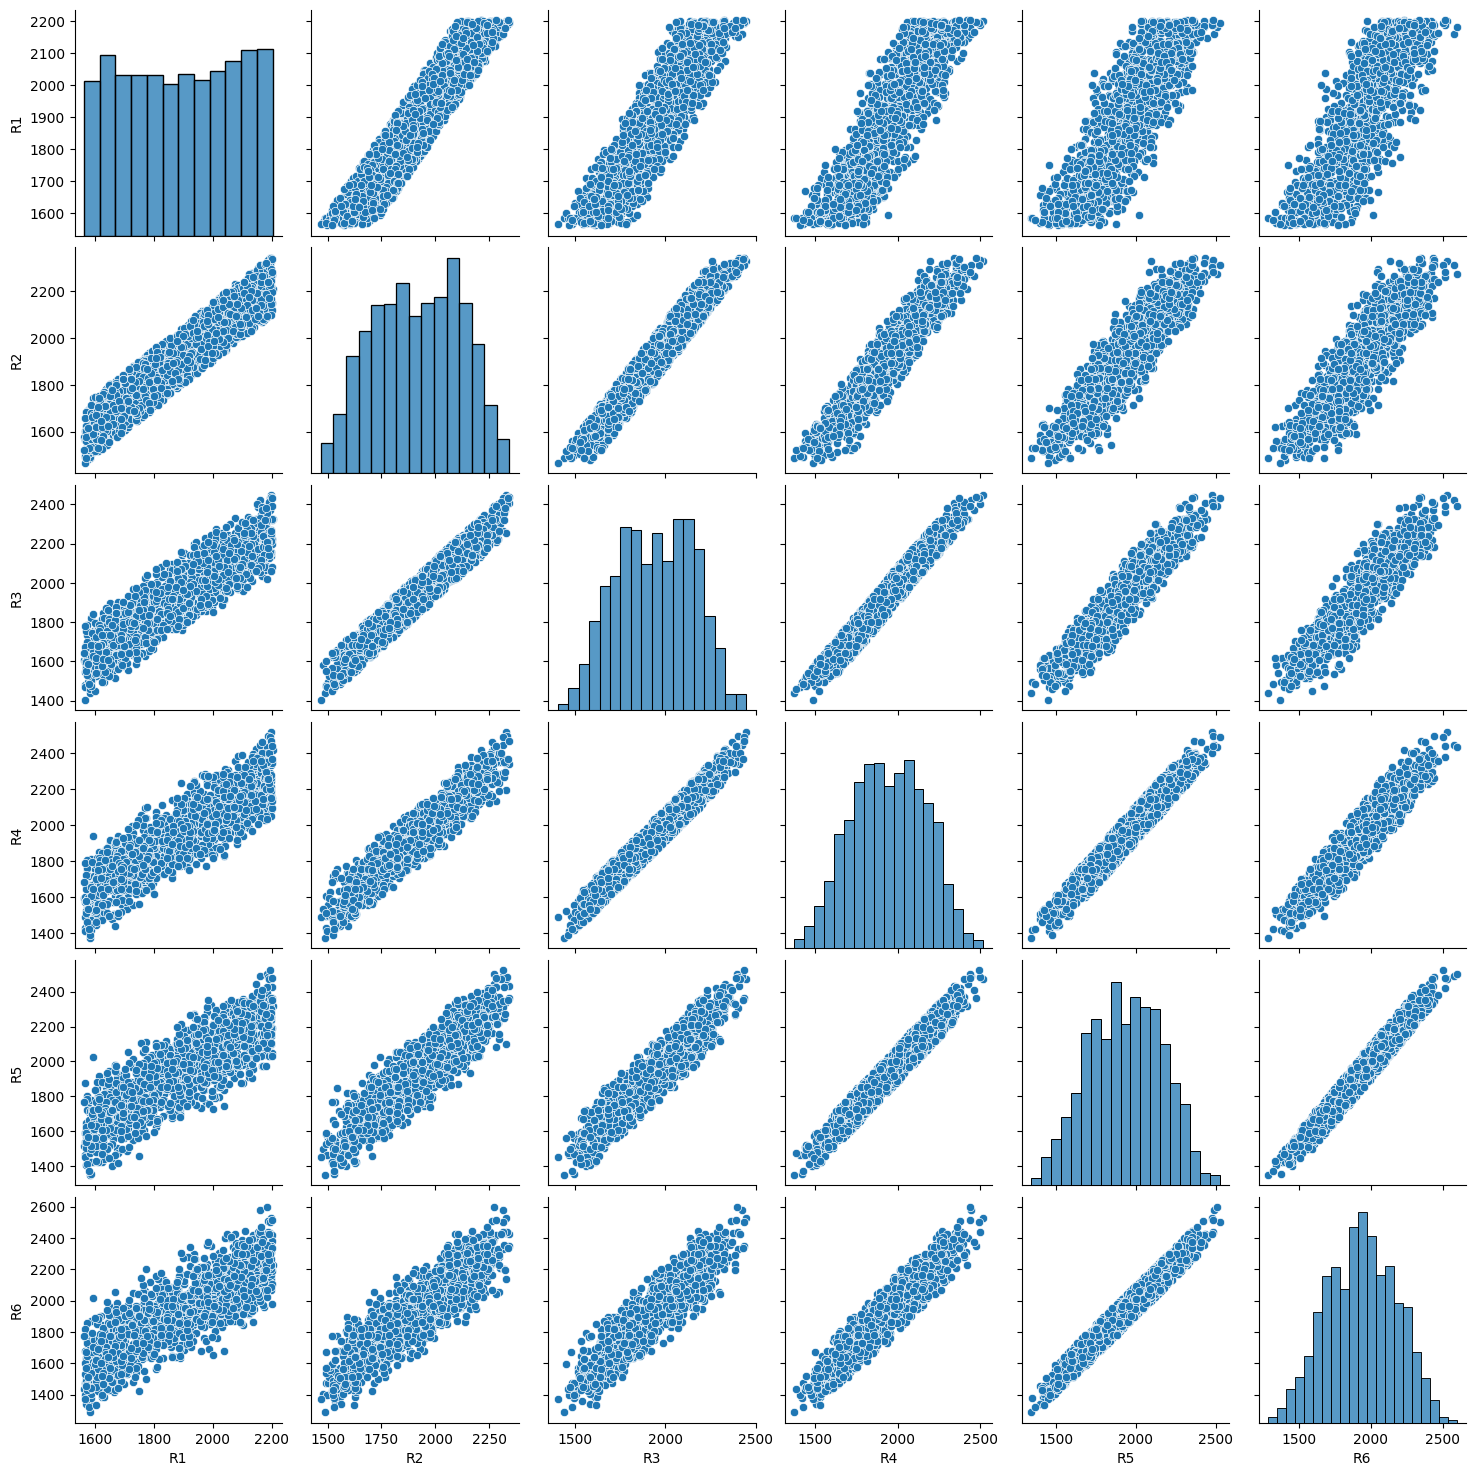

In [5]:
import seaborn as sns
sns.pairplot(df)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[ 0.20339038,  0.34165551,  0.05801565, -0.3234677 , -0.59205778],
       [-0.80014521, -0.56754624, -0.69533078, -0.41356155, -0.00966119],
       [-1.42138152, -1.05179499, -0.80833275, -0.6162727 , -0.20958838],
       ...,
       [-0.47625277, -0.80967061, -1.14263023, -1.46765956, -1.48303764],
       [ 1.37152703,  1.04826338,  0.55710766,  0.65855523,  0.35976948],
       [-1.47978836, -1.03697105, -1.23209011, -0.87754486, -0.90064105]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=21)

In [19]:
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier using the decision tree as the base classifier
adaboost = AdaBoostClassifier(base_classifier, random_state=21)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [20]:
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=21),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [21]:
# Find the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 100}


In [22]:
adaboost = AdaBoostClassifier(base_classifier, n_estimators=best_params['n_estimators'],
                              learning_rate=best_params['learning_rate'], random_state=21)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100, random_state=21)

In [23]:
# Cross-validation
cv_scores = cross_val_score(adaboost, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.00411523 0.00826446 0.00826446 0.00826446 0.00826446]
Mean CV Accuracy: 0.0074346155154235965


In [24]:
# Make predictions using the AdaBoost classifier
y_pred = adaboost.predict(X_test)


In [26]:
y_pred

array([1825, 1778, 2008, 1819, 2008, 2009, 1825, 2008, 2047, 1778, 1744,
       1970, 2009, 1778, 1934, 2008, 1778, 2008, 2008, 2008, 1964, 2008,
       1883, 2008, 1778, 1883, 2008, 1778, 1778, 1950, 2009, 1778, 2047,
       1778, 2008, 1778, 1819, 1883, 2008, 1778, 1882, 1985, 1819, 1883,
       1819, 1819, 1778, 1883, 2008, 2009, 1819, 1934, 1963, 2008, 2008,
       1985, 2047, 1778, 1883, 1865, 1778, 1778, 2230, 2009, 1778, 1964,
       2047, 1941, 1819, 1985, 1778, 2008, 2008, 1900, 2008, 2009, 1819,
       1778, 1778, 1778, 1819, 2009, 1964, 1958, 1958, 2008, 1934, 2008,
       2009, 1778, 1809, 1819, 2008, 1873, 1950, 2047, 2009, 2008, 1819,
       2001, 1819, 1819, 2008, 2008, 2008, 1985, 2047, 2086, 2008, 2008,
       1883, 1778, 1819, 1744, 1865, 1883, 2047, 1883, 2008, 1778, 2009,
       1778, 1970, 1778, 2008, 1865, 1778, 1778, 2008, 1778, 1819, 1778,
       2008, 1778, 1778], dtype=int64)

In [27]:
X_test

array([[-1.36297469e+00, -1.43227615e+00, -1.06729558e+00,
        -1.11629355e+00, -8.26754912e-01],
       [-1.07094053e+00, -1.58545688e+00, -1.43926038e+00,
        -1.09827478e+00, -1.44392145e+00],
       [ 1.62639322e+00,  1.87346279e+00,  1.51762436e+00,
         1.11352916e+00,  9.59551048e-01],
       [-1.61253116e+00, -1.61016345e+00, -1.99956179e+00,
        -2.06678364e+00, -1.84812207e+00],
       [ 1.37152703e+00,  1.81416702e+00,  1.55058327e+00,
         1.46039047e+00,  1.28986553e+00],
       [ 7.13122736e-01,  3.36714192e-01,  3.59354224e-01,
         5.05395691e-01,  6.59660266e-01],
       [-1.37359411e+00, -1.68428316e+00, -1.36863415e+00,
        -1.16584517e+00, -1.07014453e+00],
       [ 1.53081840e+00,  1.42380323e+00,  1.60237584e+00,
         1.56850309e+00,  1.29855802e+00],
       [ 3.30823466e-01,  7.81432435e-01,  3.45228978e-01,
         6.85583385e-01,  3.81500701e-01],
       [-1.23023189e+00, -1.36309776e+00, -1.08142083e+00,
        -7.28890012e-01

In [25]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0
